# Movies dataset. Preprocessing and visualization

We were assigned to preprocess a raw dataset containing the best-rated 1000 movies from IMDB. We will start by importing the essential libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.extras import average

We will load the dataset from the online source provided.

In [2]:
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)

Let's see the data types of the columns.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


It might help if we'd take a look at the first few rows.

In [4]:
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

Let's begin our data cleaning by addressing the outliers. Although we are dealing with missing values in our dataset, it is best to manage the outliers first, because filling the null values is based on the existing values, so it will be influenced by the existing outliers. We should address the outliers in the columns holding numerical values. As we can see, the columns Released_Year, Runtime, Gross are of type object, even though they clearly store numerical values, so we should firstly change their values to numeric type.

In [5]:
df['Released_Year'] = df['Released_Year'].str.replace(r'[^0-9]', '', regex=True)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Runtime'] = df['Runtime'].str.replace(r'[^0-9]', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df['Gross'] = df['Gross'].str.replace(r'[^0-9]', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

Now we can continue by handling outliers in the Released_Year column. Let's see how the variation of values looks by using boxplot.

<Axes: ylabel='Released_Year'>

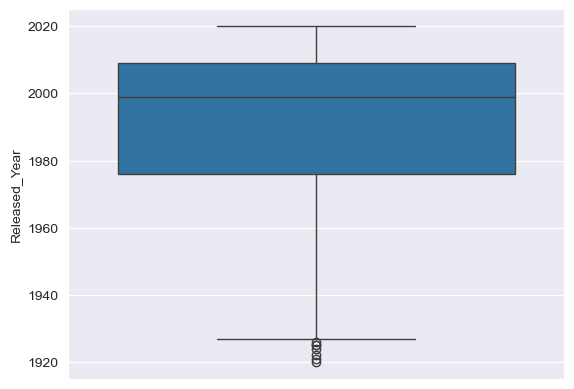

In [6]:
sns.boxplot(df['Released_Year'])

Let's also perform the describe method on the column in order to double-check the min and the max value.

In [7]:
print(df['Released_Year'].describe())

count     999.000000
mean     1991.217217
std        23.297025
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64


As we can see, the min value is 1920 and the max value is 2020. The first movie ever was released in 1895, so we are dealing with no outliers in column Released_Year. We will proceed by applying the same method to the Runtime.

<Axes: ylabel='Runtime'>

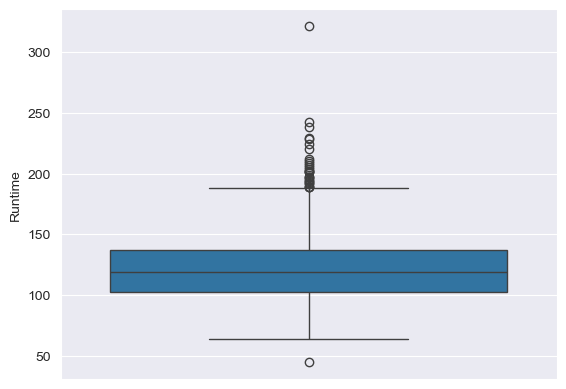

In [8]:
sns.boxplot(df['Runtime'])

It does not seem like we are dealing with outliers in the column Runtime either. we can see that we have a value that is beneath the lower bound, which might be a short film, and values above the upper bound, which might be long films. Let's continue by addressing the column IMDB_Rating.

<Axes: ylabel='IMDB_Rating'>

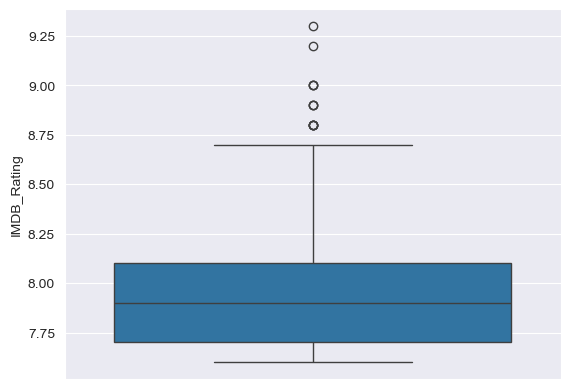

In [9]:
sns.boxplot(df['IMDB_Rating'])

We do not seem to have outliers here either. There are values above the upper bound, but they are valid. Next: Meta_score.

<Axes: ylabel='Meta_score'>

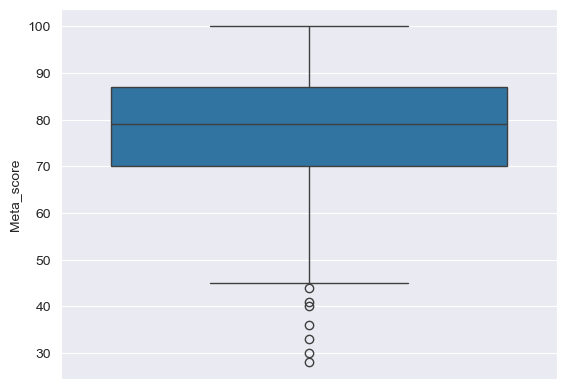

In [10]:
sns.boxplot(df['Meta_score'])

In [11]:
print(df['Meta_score'].describe())

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64


No outliers, let's proceed to No_of_Votes.

<Axes: ylabel='No_of_Votes'>

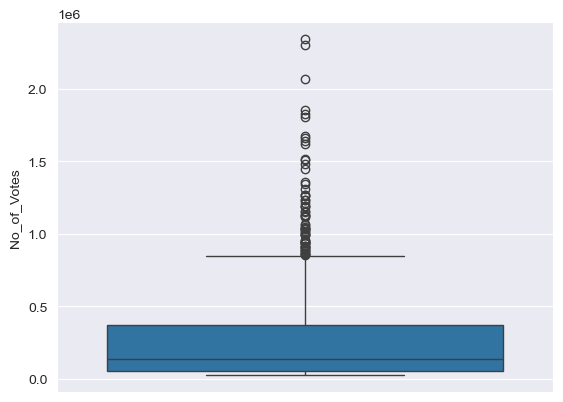

In [12]:
sns.boxplot(df['No_of_Votes'])

In [13]:
print(df['No_of_Votes'].describe())

count    1.000000e+03
mean     2.736929e+05
std      3.273727e+05
min      2.508800e+04
25%      5.552625e+04
50%      1.385485e+05
75%      3.741612e+05
max      2.343110e+06
Name: No_of_Votes, dtype: float64


I believe we should address outliers for this column.

In [14]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

df = remove_outliers(df, 'No_of_Votes')

Let's see how our data looks now (how many rows we have deleted).

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 4 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    933 non-null    object 
 1   Series_Title   933 non-null    object 
 2   Released_Year  932 non-null    float64
 3   Certificate    832 non-null    object 
 4   Runtime        933 non-null    int64  
 5   Genre          933 non-null    object 
 6   IMDB_Rating    933 non-null    float64
 7   Overview       933 non-null    object 
 8   Meta_score     776 non-null    float64
 9   Director       933 non-null    object 
 10  Star1          933 non-null    object 
 11  Star2          933 non-null    object 
 12  Star3          933 non-null    object 
 13  Star4          933 non-null    object 
 14  No_of_Votes    933 non-null    int64  
 15  Gross          764 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 123.9+ KB
None


We deleted 67 rows as a result of handling the outliers in No_of_Votes. I decided to remove the outliers in that column because their data could have been false, as a result of an exceeding No_of_Votes, maybe there were bots that voted for the movie or such things. Let's see about Gross column.

<Axes: ylabel='Gross'>

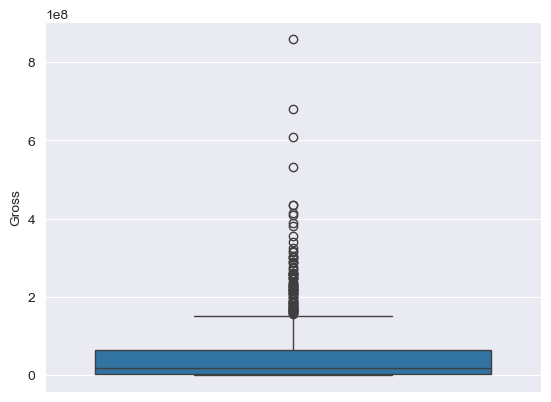

In [16]:
sns.boxplot(df['Gross'])

In [17]:
print(df['Gross'].describe())

count    7.640000e+02
mean     5.448892e+07
std      8.877161e+07
min      1.305000e+03
25%      2.623352e+06
50%      1.769674e+07
75%      6.407594e+07
max      8.583730e+08
Name: Gross, dtype: float64


The Gross column is expected to have outliers above the upper bound. It is a normal thing for a movie to have a rule-breaking profit. Now that we've addressed the outliers, we should have a look at the amount of missing values of our dataset, as it affects our analysis.

In [18]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


The columns containing missing values are Certificate, Meta_score and Gross. None of them has an exceeding amount of null values, so there's no need for us to remove any of the columns. We will start by addressing the null values from the Meta_score column. I believe the best approach here is to replace the null values with the mean of the non-null values, since Meta_score preserves a numerical value.

In [19]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

I have a theory that might help with handling the missing values from the column Gross. I believe that the movie's director has an influence on the gross of the film. Let's check my theory!

In [20]:
df_director = df.dropna(subset=['Gross']).groupby('Director')['Gross'].mean().sort_values(ascending=False)

print("\nTop 5 Directors by Average Gross:")
for director, avg_gross in df_director.head(5).items():
    print(f"Director: {director} Average gross: {avg_gross}")


Top 5 Directors by Average Gross:
Director: Anthony Russo Average gross: 551259850.75
Director: Gareth Edwards Average gross: 532177324.0
Director: Josh Cooley Average gross: 434038008.0
Director: James Gunn Average gross: 389813101.0
Director: Byron Howard Average gross: 341268248.0


I grouped the movies by director, in order to find the average Gross generated by the movies directed by a specific director, so that I could check my hypothesis. It seems that the Gross of a movie is profoundly influenced by the "name" of the director. So we should fill the missing values using group level statistics.

In [21]:
df['Gross'] = df['Gross'].fillna(df.groupby('Director')['Gross'].transform('mean'))

Let's have a look one more time at the missing values in our data.

In [22]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross             85
dtype: int64


After performing this, the Gross column still has 85 missing values. That is because there are directors for which none of their movies have the column Gross filled. So, in this case, we will complete the remaining missing values with the overall mean.

In [23]:
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In order to handle the missing values for the Certificate field, I firstly need to iterate through the data frame and store the distinct values of certification, so I can see which values can the Certificate column take.

In [24]:
distinct_certificate = df['Certificate'].dropna().drop_duplicates()
print(distinct_certificate)

4             U
12            A
18        PG-13
32           PG
35           UA
38            R
51            G
82       Passed
91        TV-14
197          16
198       TV-MA
240     Unrated
287          GP
307    Approved
349       TV-PG
878         U/A
Name: Certificate, dtype: object


Now that we've seen the distinct Certificate values, the best approach is to replace the missing values with 'Unrated', as no institution rated those films.

In [25]:
df['Certificate'] = df['Certificate'].fillna('Unrated')

Let's see if we are still dealing with any missing values now.

In [26]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


We can observe that we have a missing value for Released_Year. That happened as a cause of the formating done when we switched from object type to float type. So that row has a Released_Year value that is in a different format. It is best to delete the row.

In [27]:
df = df.dropna(subset=['Released_Year'])

In [28]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


Another data preprocessing tool we should apply is to encode the Certificate column using one-hot technique.

In [29]:
df = pd.get_dummies(df, columns=['Certificate'])

Let's see what columns we have now.

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 4 to 999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Poster_Link           932 non-null    object 
 1   Series_Title          932 non-null    object 
 2   Released_Year         932 non-null    float64
 3   Runtime               932 non-null    int64  
 4   Genre                 932 non-null    object 
 5   IMDB_Rating           932 non-null    float64
 6   Overview              932 non-null    object 
 7   Meta_score            932 non-null    float64
 8   Director              932 non-null    object 
 9   Star1                 932 non-null    object 
 10  Star2                 932 non-null    object 
 11  Star3                 932 non-null    object 
 12  Star4                 932 non-null    object 
 13  No_of_Votes           932 non-null    int64  
 14  Gross                 932 non-null    float64
 15  Certificate_16        932 no

Let's see how many values we have for the Genre column, see if we can proceed with the encoding for it too.

In [31]:
distinct_genre = df['Genre'].dropna().drop_duplicates()
print(distinct_genre.count())

202


Obviously, it would be unwise if we would encode this column too. 202 more columns is a waste of memory. Another waste of memory is caused by the column Poster_Link. There is no need for the link of an image in our dataset, so there is no need to process it. Let's get rid of it.

In [32]:
df = df.drop(columns=['Poster_Link'])

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 4 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          932 non-null    object 
 1   Released_Year         932 non-null    float64
 2   Runtime               932 non-null    int64  
 3   Genre                 932 non-null    object 
 4   IMDB_Rating           932 non-null    float64
 5   Overview              932 non-null    object 
 6   Meta_score            932 non-null    float64
 7   Director              932 non-null    object 
 8   Star1                 932 non-null    object 
 9   Star2                 932 non-null    object 
 10  Star3                 932 non-null    object 
 11  Star4                 932 non-null    object 
 12  No_of_Votes           932 non-null    int64  
 13  Gross                 932 non-null    float64
 14  Certificate_16        932 non-null    bool   
 15  Certificate_A         932 no

Now that the preprocessing part is done, let's dive into visualization of our data. I am curious to see the trend in the certification of the first 50 movies ordered by gross in descending order.

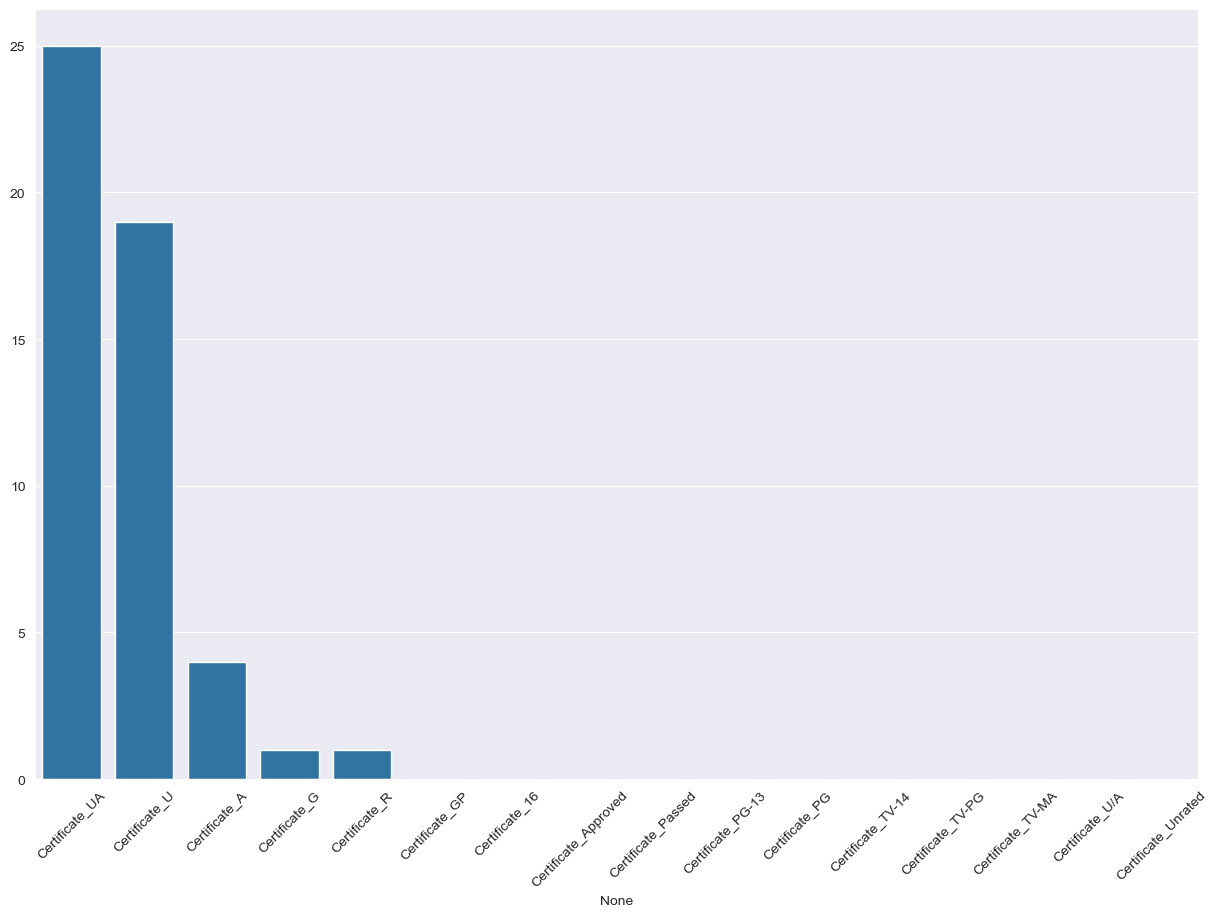

In [34]:
df_top_50 = df.nlargest(50, 'Gross')
df_top_50 = df_top_50[['Certificate_16', 'Certificate_A', 'Certificate_Approved', 'Certificate_G', 'Certificate_GP', 'Certificate_PG', 'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R', 'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A', 'Certificate_UA', 'Certificate_Unrated']]
df_top_50 = df_top_50.sum()
df_top_50 = df_top_50.sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=df_top_50.index, y=df_top_50.values)
plt.xticks(rotation=45)
plt.show()

So, a quick observation would be the fact that half of the first 50 movies with the highest gross are certificated as UA, which means that children can watch the movies by parental guidance. But the trend for U certifications among these movies is close to the one of UA certifications. As U means unrestricted watch, and UA means unrestricted for children above the age of 12, that can reflect that the movies with the biggest profit are made for children and teens.

Let's see what the spread of genres is like in these movies.

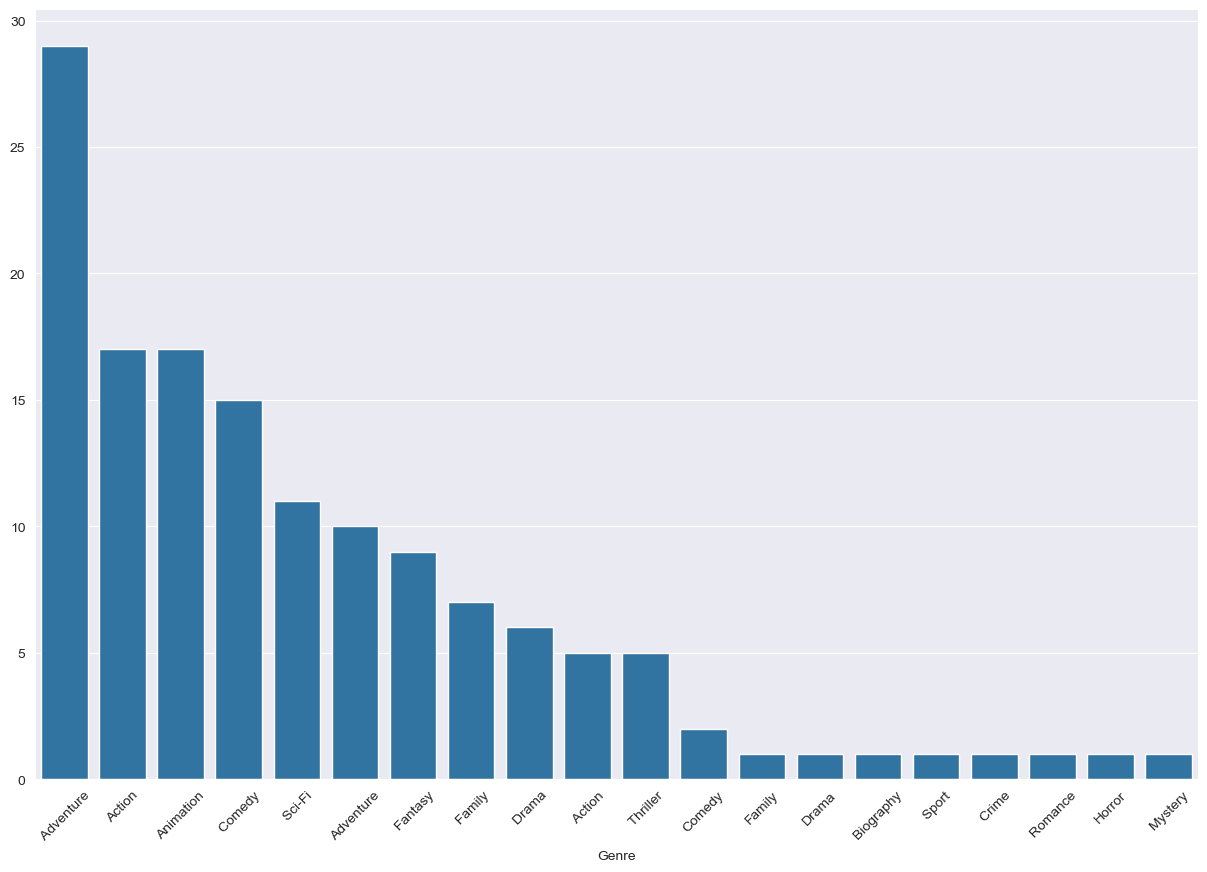

In [35]:
df_top_50 = df.nlargest(50, 'Gross')
df_top_50 = df_top_50['Genre']
df_top_50 = df_top_50.str.split(',').explode()
df_top_50 = df_top_50.value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=df_top_50.index, y=df_top_50.values)
plt.xticks(rotation=45)
plt.show()

30 out of 50 of these movies are about adventure. As expected, the most successful movies do not make people fall asleep.

Let's see the average of IMDB_Rating and of Meta_score for movies grouped by Released_Year.

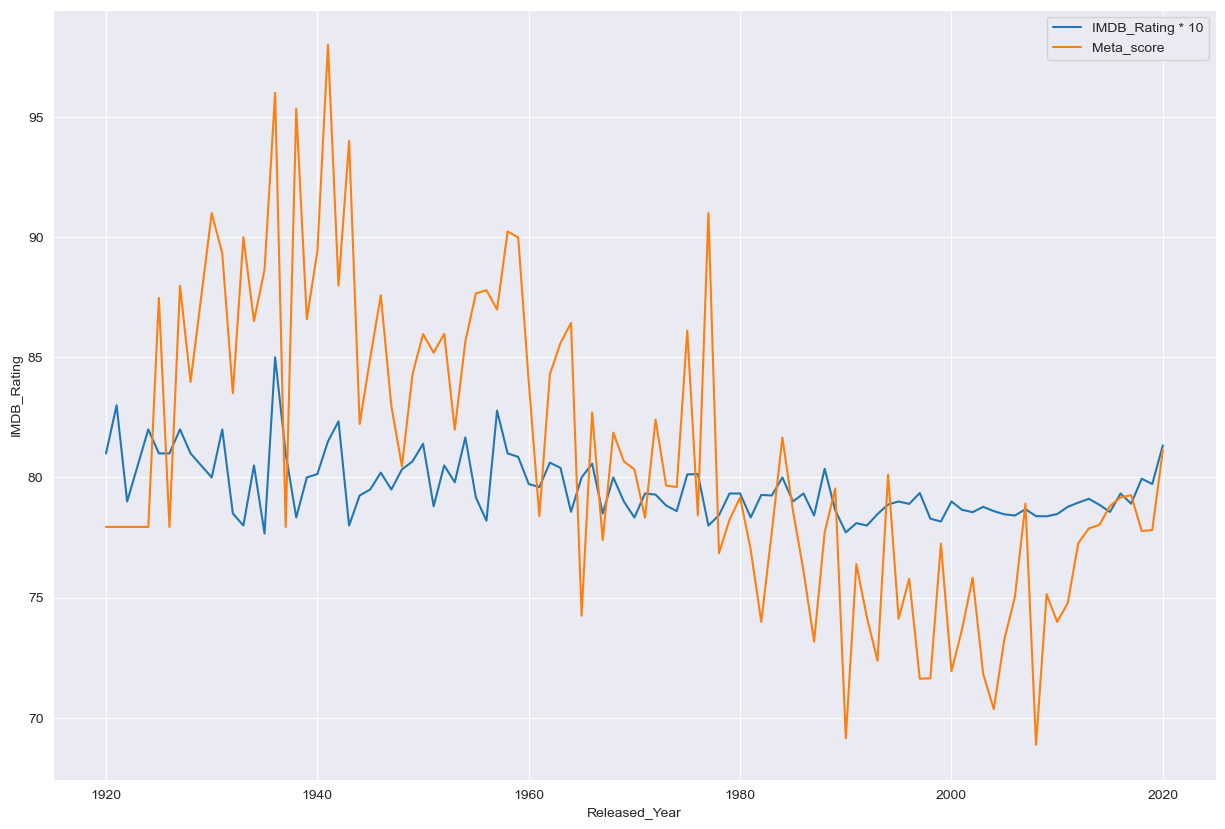

In [36]:
df_grouped = df.groupby('Released_Year')[['IMDB_Rating', 'Meta_score']].mean()
df_grouped['IMDB_Rating'] = df_grouped['IMDB_Rating'] * 10
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_grouped, x=df_grouped.index, y='IMDB_Rating', label='IMDB_Rating * 10')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='Meta_score', label='Meta_score')
plt.show()

We can see that the tendency for critics is to find movies released before the 80s more interesting than the ones released after the 80s. But the audience has a different opinion, as they find the movies from each era appealing.

Let's dive deeper into the analysis and see who are the actors who have starred in the highest number of films as lead characters for each of the eras (before 80s and after 80s).

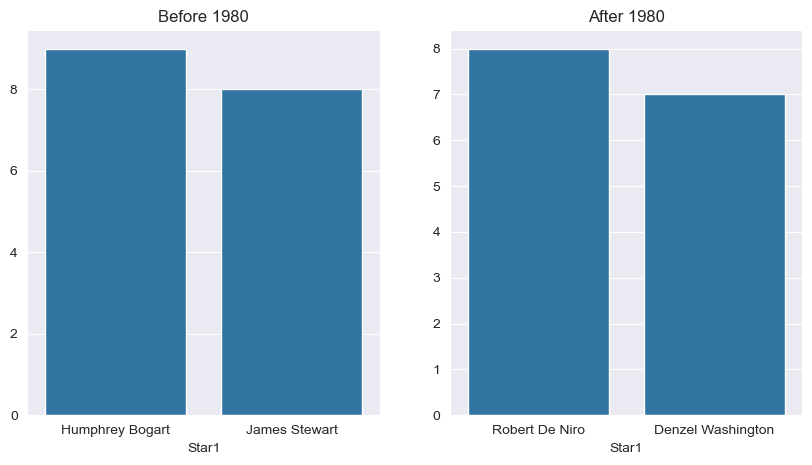

In [37]:
df_before_80 = df[df['Released_Year'] < 1980]
df_after_80 = df[df['Released_Year'] >= 1980]
df_before_80 = df_before_80['Star1'].value_counts().head(2)
df_after_80 = df_after_80['Star1'].value_counts().head(2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_before_80.index, y=df_before_80.values)
plt.title('Before 1980')
plt.subplot(1, 2, 2)
sns.barplot(x=df_after_80.index, y=df_after_80.values)
plt.title('After 1980')
plt.show()

Whilst Humphrey Bogart and James Stewart owned a more theatrical style of acting, De Niro and Washington are known for more naturalistic performances. That might be a clue why critics scored movies made after 80s so low. They enjoy the more theatrical style of acting.

Let's see the graph of the spread of A certifications within the years.

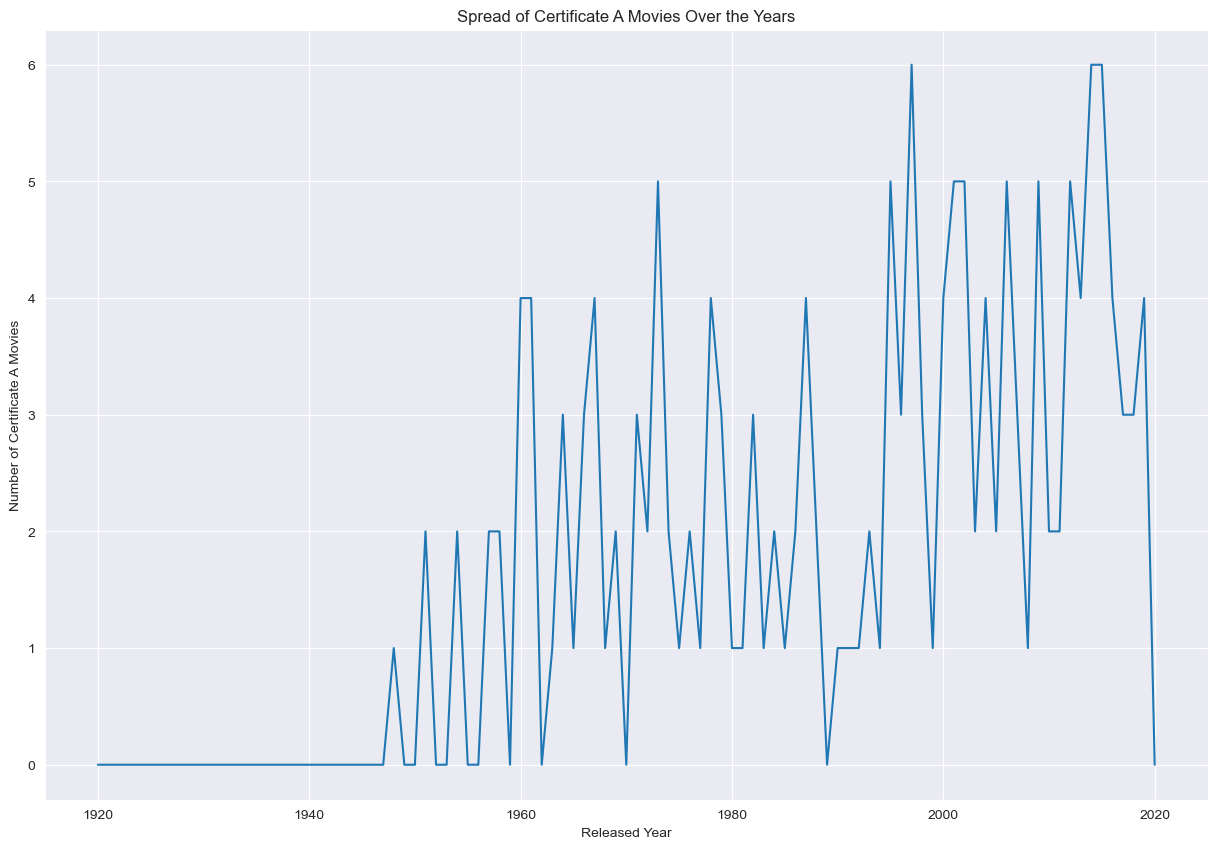

In [38]:
df_grouped = df.groupby('Released_Year')['Certificate_A'].sum().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_grouped, x='Released_Year', y='Certificate_A')
plt.xlabel('Released Year')
plt.ylabel('Number of Certificate A Movies')
plt.title('Spread of Certificate A Movies Over the Years')
plt.show()

Judging by the eye, we can guess that after the 90s, there is an increase in the A certificated movies, one can say that the older movies are safer to watch for kids then the ones produced nowadays.

Let's have a look at the average of the Meta_score for each genre.

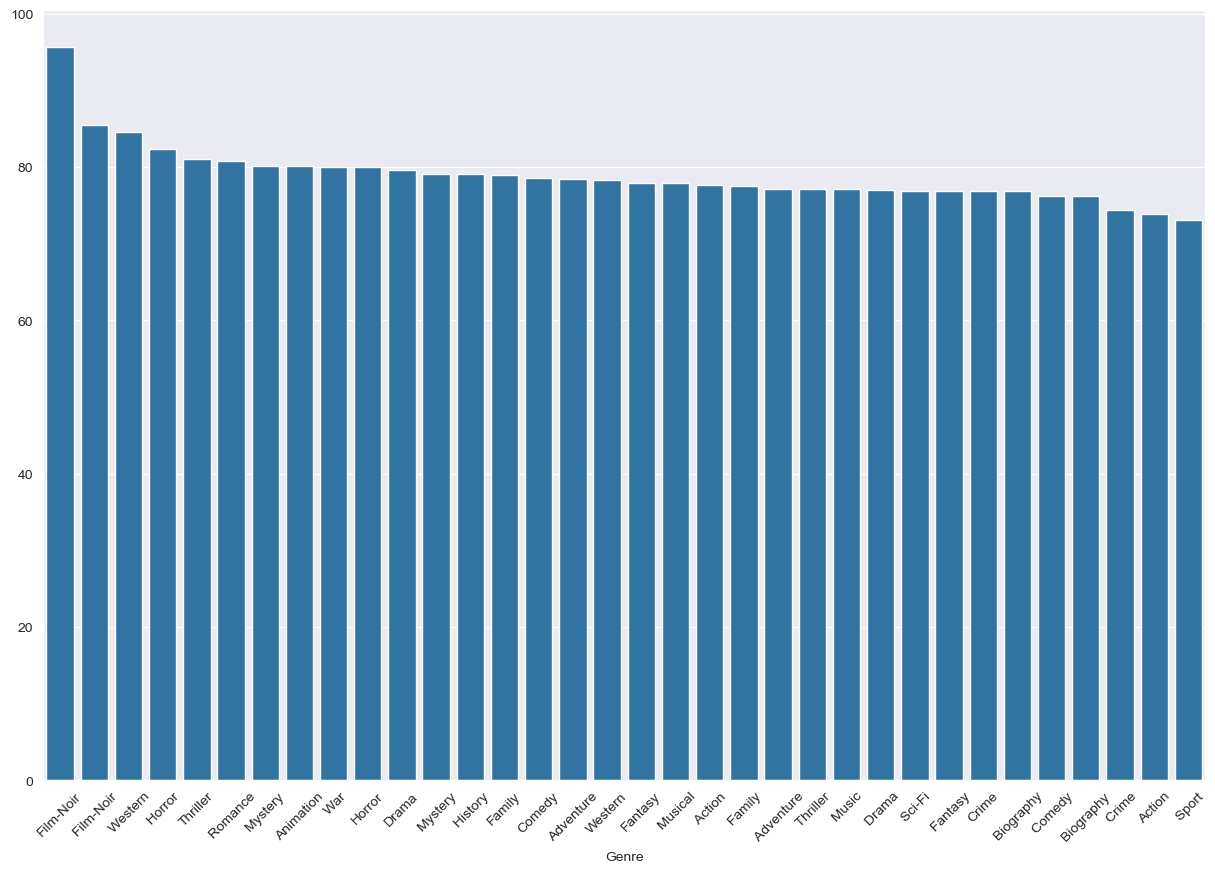

In [39]:
df_grouped = df[['Genre', 'Meta_score']].copy()
df_grouped = df_grouped.dropna(subset=['Meta_score'])
df_grouped = df_grouped.assign(Genre=df_grouped['Genre'].str.split(',')).explode('Genre')
df_grouped = df_grouped.groupby('Genre')['Meta_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=45)
plt.show()

Let's create a movie recommendation system, a function that has as input a movie title and it outputs 5 similar movies.

In [40]:
def recommend_movies(movie_title):
    movie = df[df['Series_Title'] == movie_title]
    if movie.empty:
        return "Movie not found in the dataset."

    similar_movies = []
    for genre in movie['Genre'].values[0].split(','):
        similar_movies.extend(df[df['Genre'].str.contains(genre)]['Series_Title'].values)

    similar_movies = [m for m in similar_movies if m != movie_title]

    if len(similar_movies) > 5:
        similar_movies = list(set(similar_movies))
        similar_movies = [m for m in similar_movies if abs(df[df['Series_Title'] == m]['Released_Year'].values[0] - movie['Released_Year'].values[0]) <= 10]

    if len(similar_movies) > 5:
        movie_actors = set(movie[['Star1', 'Star2', 'Star3', 'Star4']].values[0])
        similar_movies = [m for m in similar_movies if not movie_actors.isdisjoint(set(df[df['Series_Title'] == m][['Star1', 'Star2', 'Star3', 'Star4']].values[0]))]

    if len(similar_movies) > 5:
        movie_director = movie['Director'].values[0]
        similar_movies = [m for m in similar_movies if movie_director == df[df['Series_Title'] == m]['Director'].values[0]]

    if len(similar_movies) > 5:
        movie_rating = movie['IMDB_Rating'].values[0]
        similar_movies = [m for m in similar_movies if movie_rating - 1 <= df[df['Series_Title'] == m]['IMDB_Rating'].values[0] <= movie_rating + 1]

    return similar_movies[:5] if similar_movies else "No similar movies found."

In [41]:
print(df.head())

                       Series_Title  Released_Year  Runtime  \
4                      12 Angry Men         1957.0       96   
12  Il buono, il brutto, il cattivo         1966.0      161   
18                         Hamilton         2020.0      160   
19                     Gisaengchung         2019.0      132   
20                  Soorarai Pottru         2020.0      153   

                        Genre  IMDB_Rating  \
4                Crime, Drama          9.0   
12                    Western          8.8   
18  Biography, Drama, History          8.6   
19    Comedy, Drama, Thriller          8.6   
20                      Drama          8.6   

                                             Overview  Meta_score  \
4   A jury holdout attempts to prevent a miscarria...    96.00000   
12  A bounty hunting scam joins two men in an unea...    90.00000   
18  The real life of one of America's foremost fou...    90.00000   
19  Greed and class discrimination threaten the ne...    96.00000   

In [45]:
print(recommend_movies('The Notebook'))

['About Time', 'Drive', 'Midnight in Paris', 'Persepolis']
